# Final Project: Spotify Top 100 Streamed Songs (2021) by Caroline Pruitt
### Data Source Credit to PavanKalyan on Kaggle.com 

> For my final project, I constructed a data narrative using the Top 100 Streamed Songs from Spotify as of December 2021. This dataset included 14 variables including the title, artist, year, and genre of the song. It should be noted that Spotify has a wide array of genres that are much more specific than layman's terms, including (but not limited to): irish singer-songwriter, north carolina hip-hop, electro house, and beatlesque. Other variables were more descriptive of the type of song including the beats per minute, energy, danceability, loudness (in decibels), liveness, valance, length (in seconds), acousticness, speechiness, and popularity. 
> The first plot I made looked at the average descriptive scores of all the songs (not including beats per minute, loudness, or length) to determine which variables were likely to be the most important to a song being streamed more often. Based on the average scores, danceability (higher values equal easier to dance to) and energy (higher value equals more energetic) appeared to be the highest. I then looked at the frequency of Top 100 songs by genre and found that 'dance pop' had just under 30 songs which was much higher than it's successor, 'pop', with just over 10 songs. To examine the relationship between danceability, popularity, and potentially genre, I created a scatterplot and colored the points by genre. The scatterplot didn't reveal much as many of the songs were clustered around a popularity score of 80 regardless of danceability. Finally, I created another bar graph to see whether the average scores of the descriptive variables would remain consistent in 'dance pop', the highest frequency genre. 

In [1]:
top100 = read.csv('https://raw.githubusercontent.com/pruittcn/Final-Project/main/Top%20100%20most%20Streamed%20-%20Sheet1.csv')
head(top100)


,title,artist,top.genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
2,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
3,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
4,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
5,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
6,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,86


In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


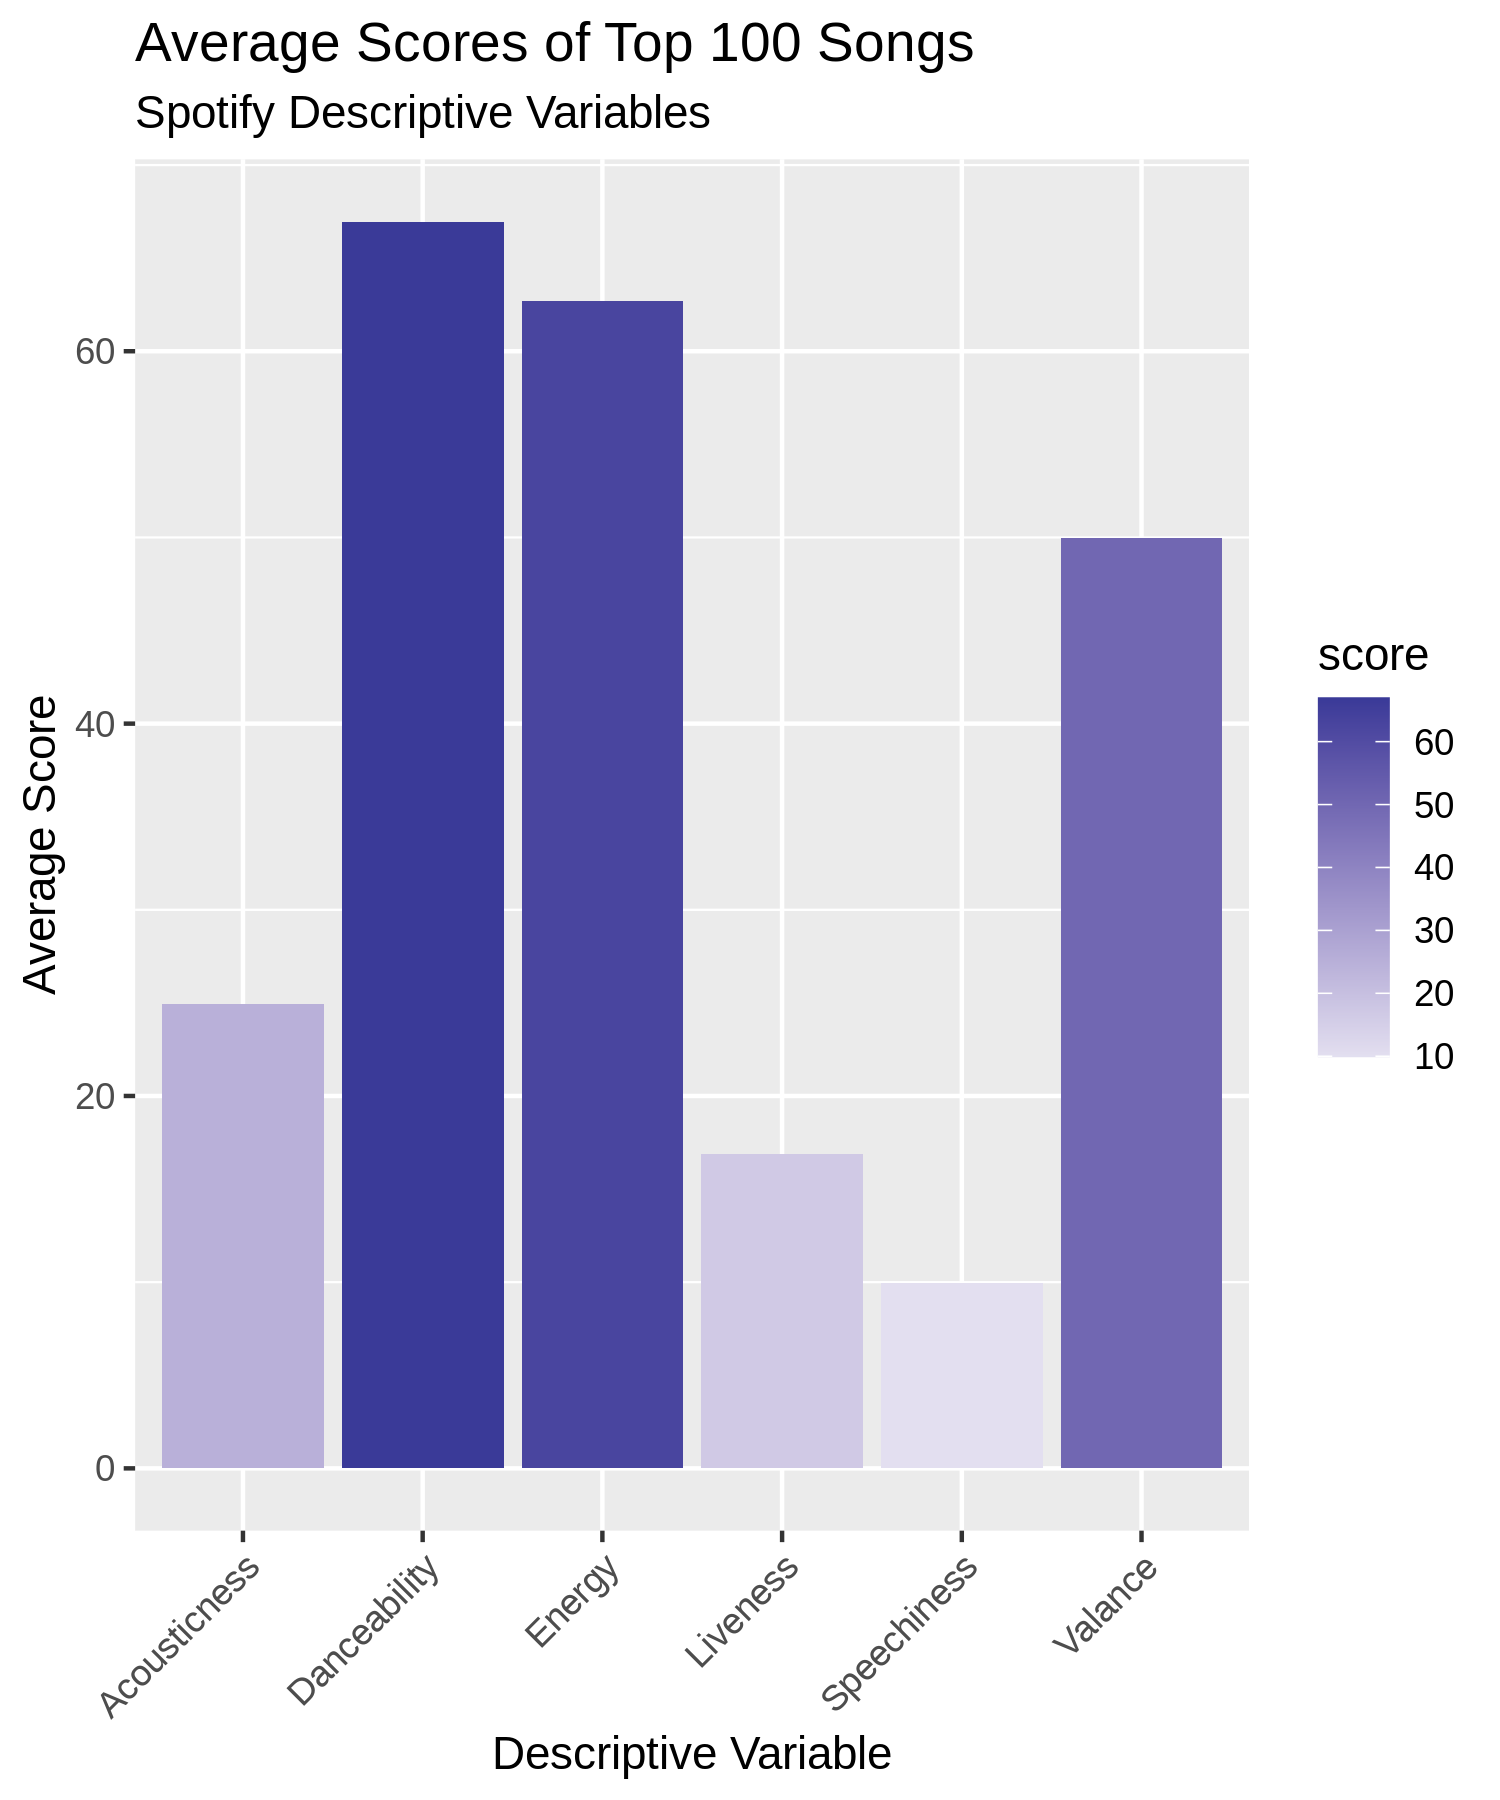

In [49]:
df <- data.frame(var = c("Danceability", "Energy", "Valance", "Acousticness", "Liveness",
                        "Speechiness" ), score = c( 66.96, 62.68, 49.97, 24.95, 16.86, 9.93))
options(repr.plot.width = 5, repr.plot.height = 6) 
ggplot(df, aes(var, score)) +
  geom_col(aes(fill=score)) + scale_fill_gradient2()+
guides(x = guide_axis(angle = 45))+
labs(title="Average Scores of Top 100 Songs", subtitle="Spotify Descriptive Variables", x="Descriptive Variable", y="Average Score") 
#data pulled from summary(top100)


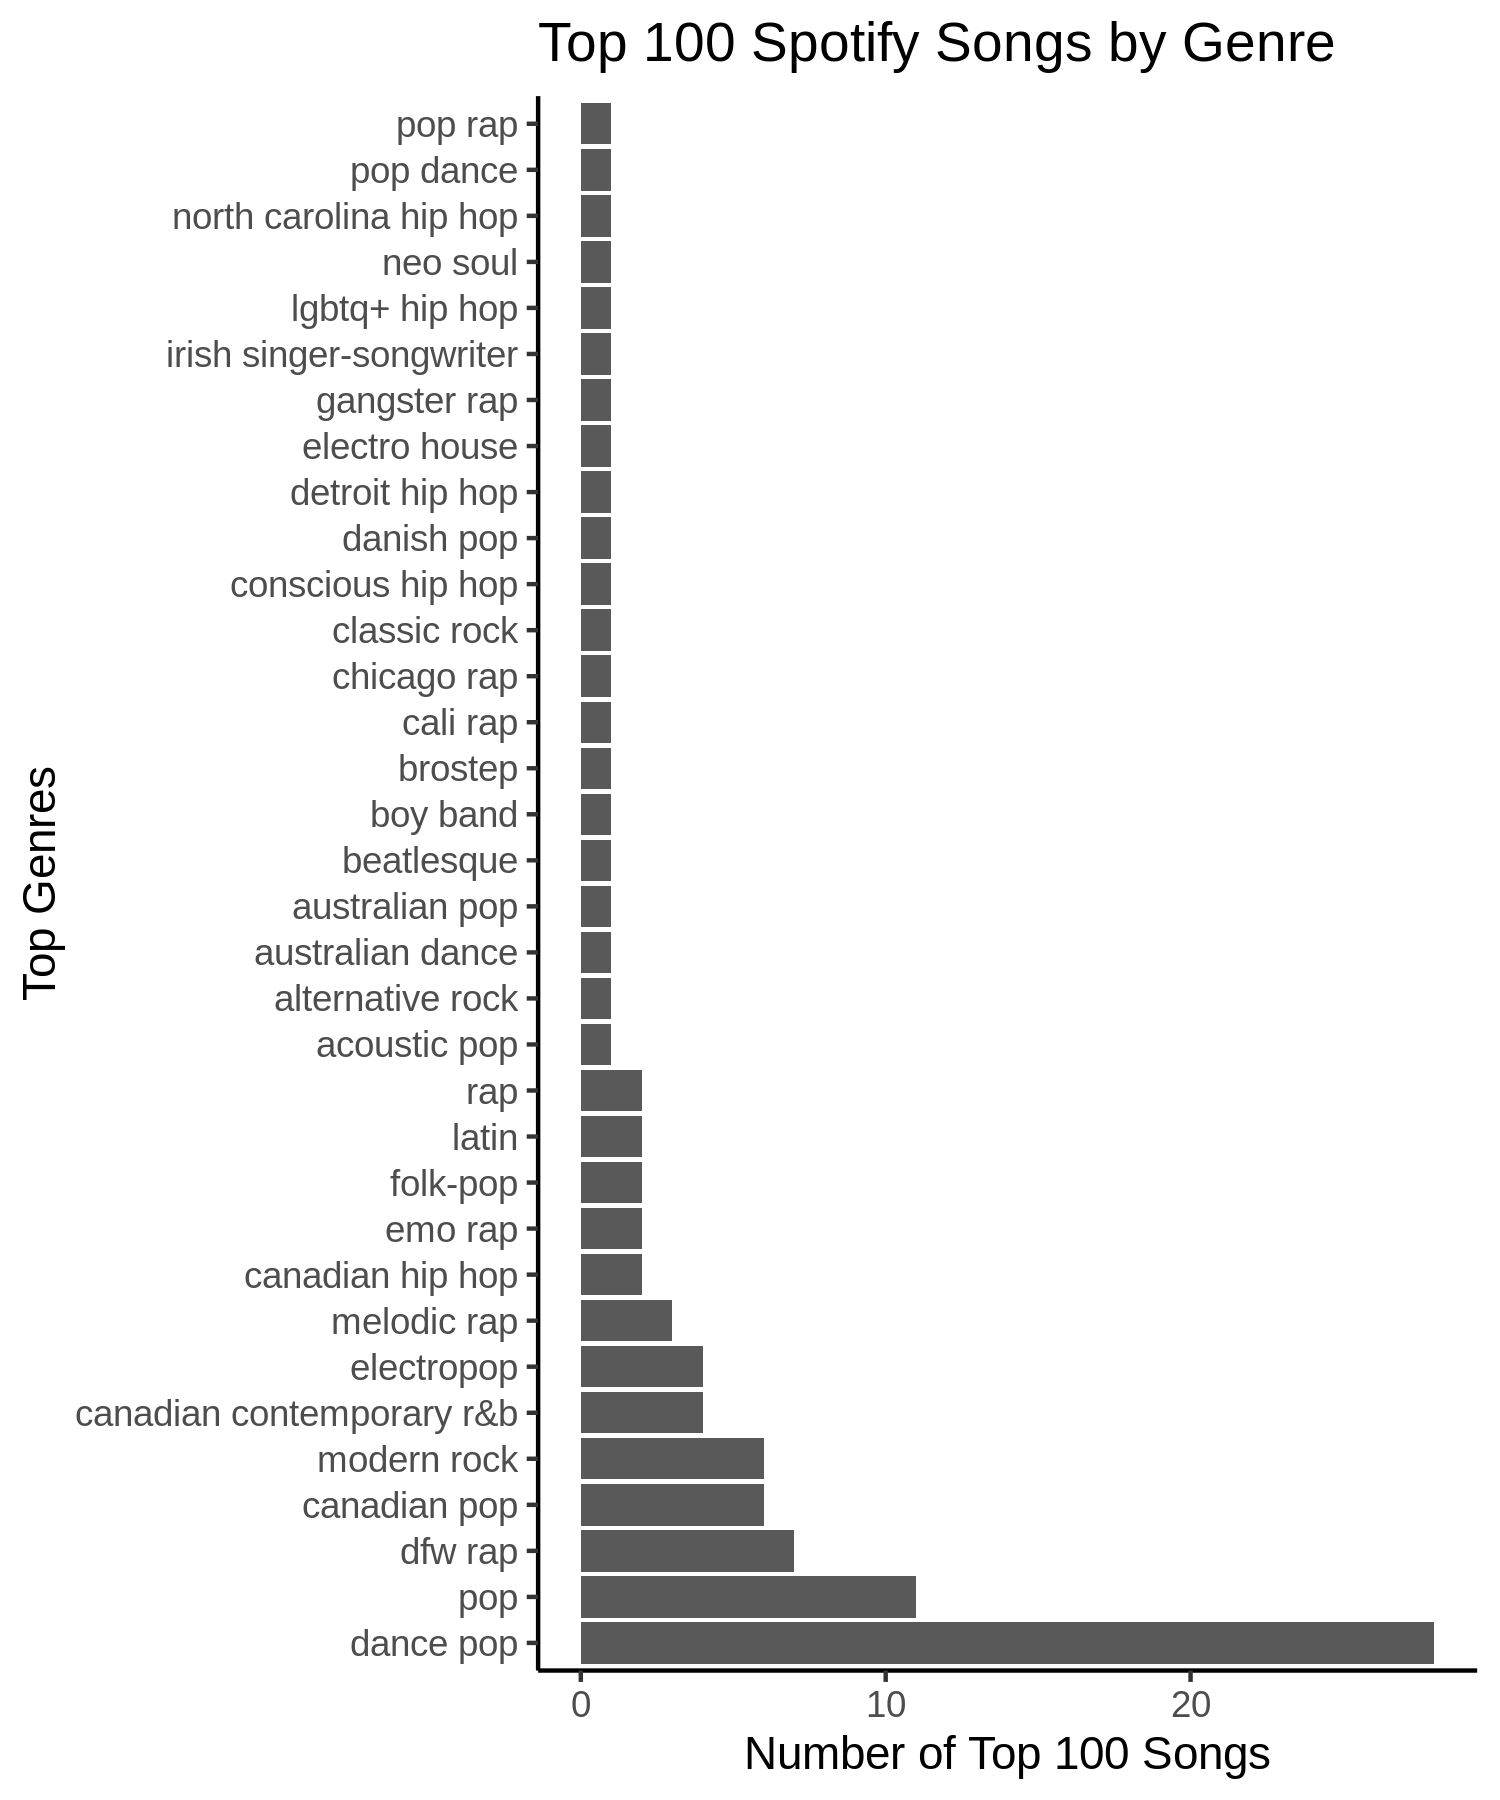

In [41]:
top101 = top100 |>
mutate(top.gen=fct_infreq(top.genre) |>
                   fct_lump_lowfreq('Other'))

options(repr.plot.width = 5, repr.plot.height = 6) 
p = ggplot(top101, aes(y=top.gen)) + geom_bar()
p = p + labs(y= "Top Genres", x= "Number of Top 100 Songs", title="Top 100 Spotify Songs by Genre", )
p = p + theme_classic()
p

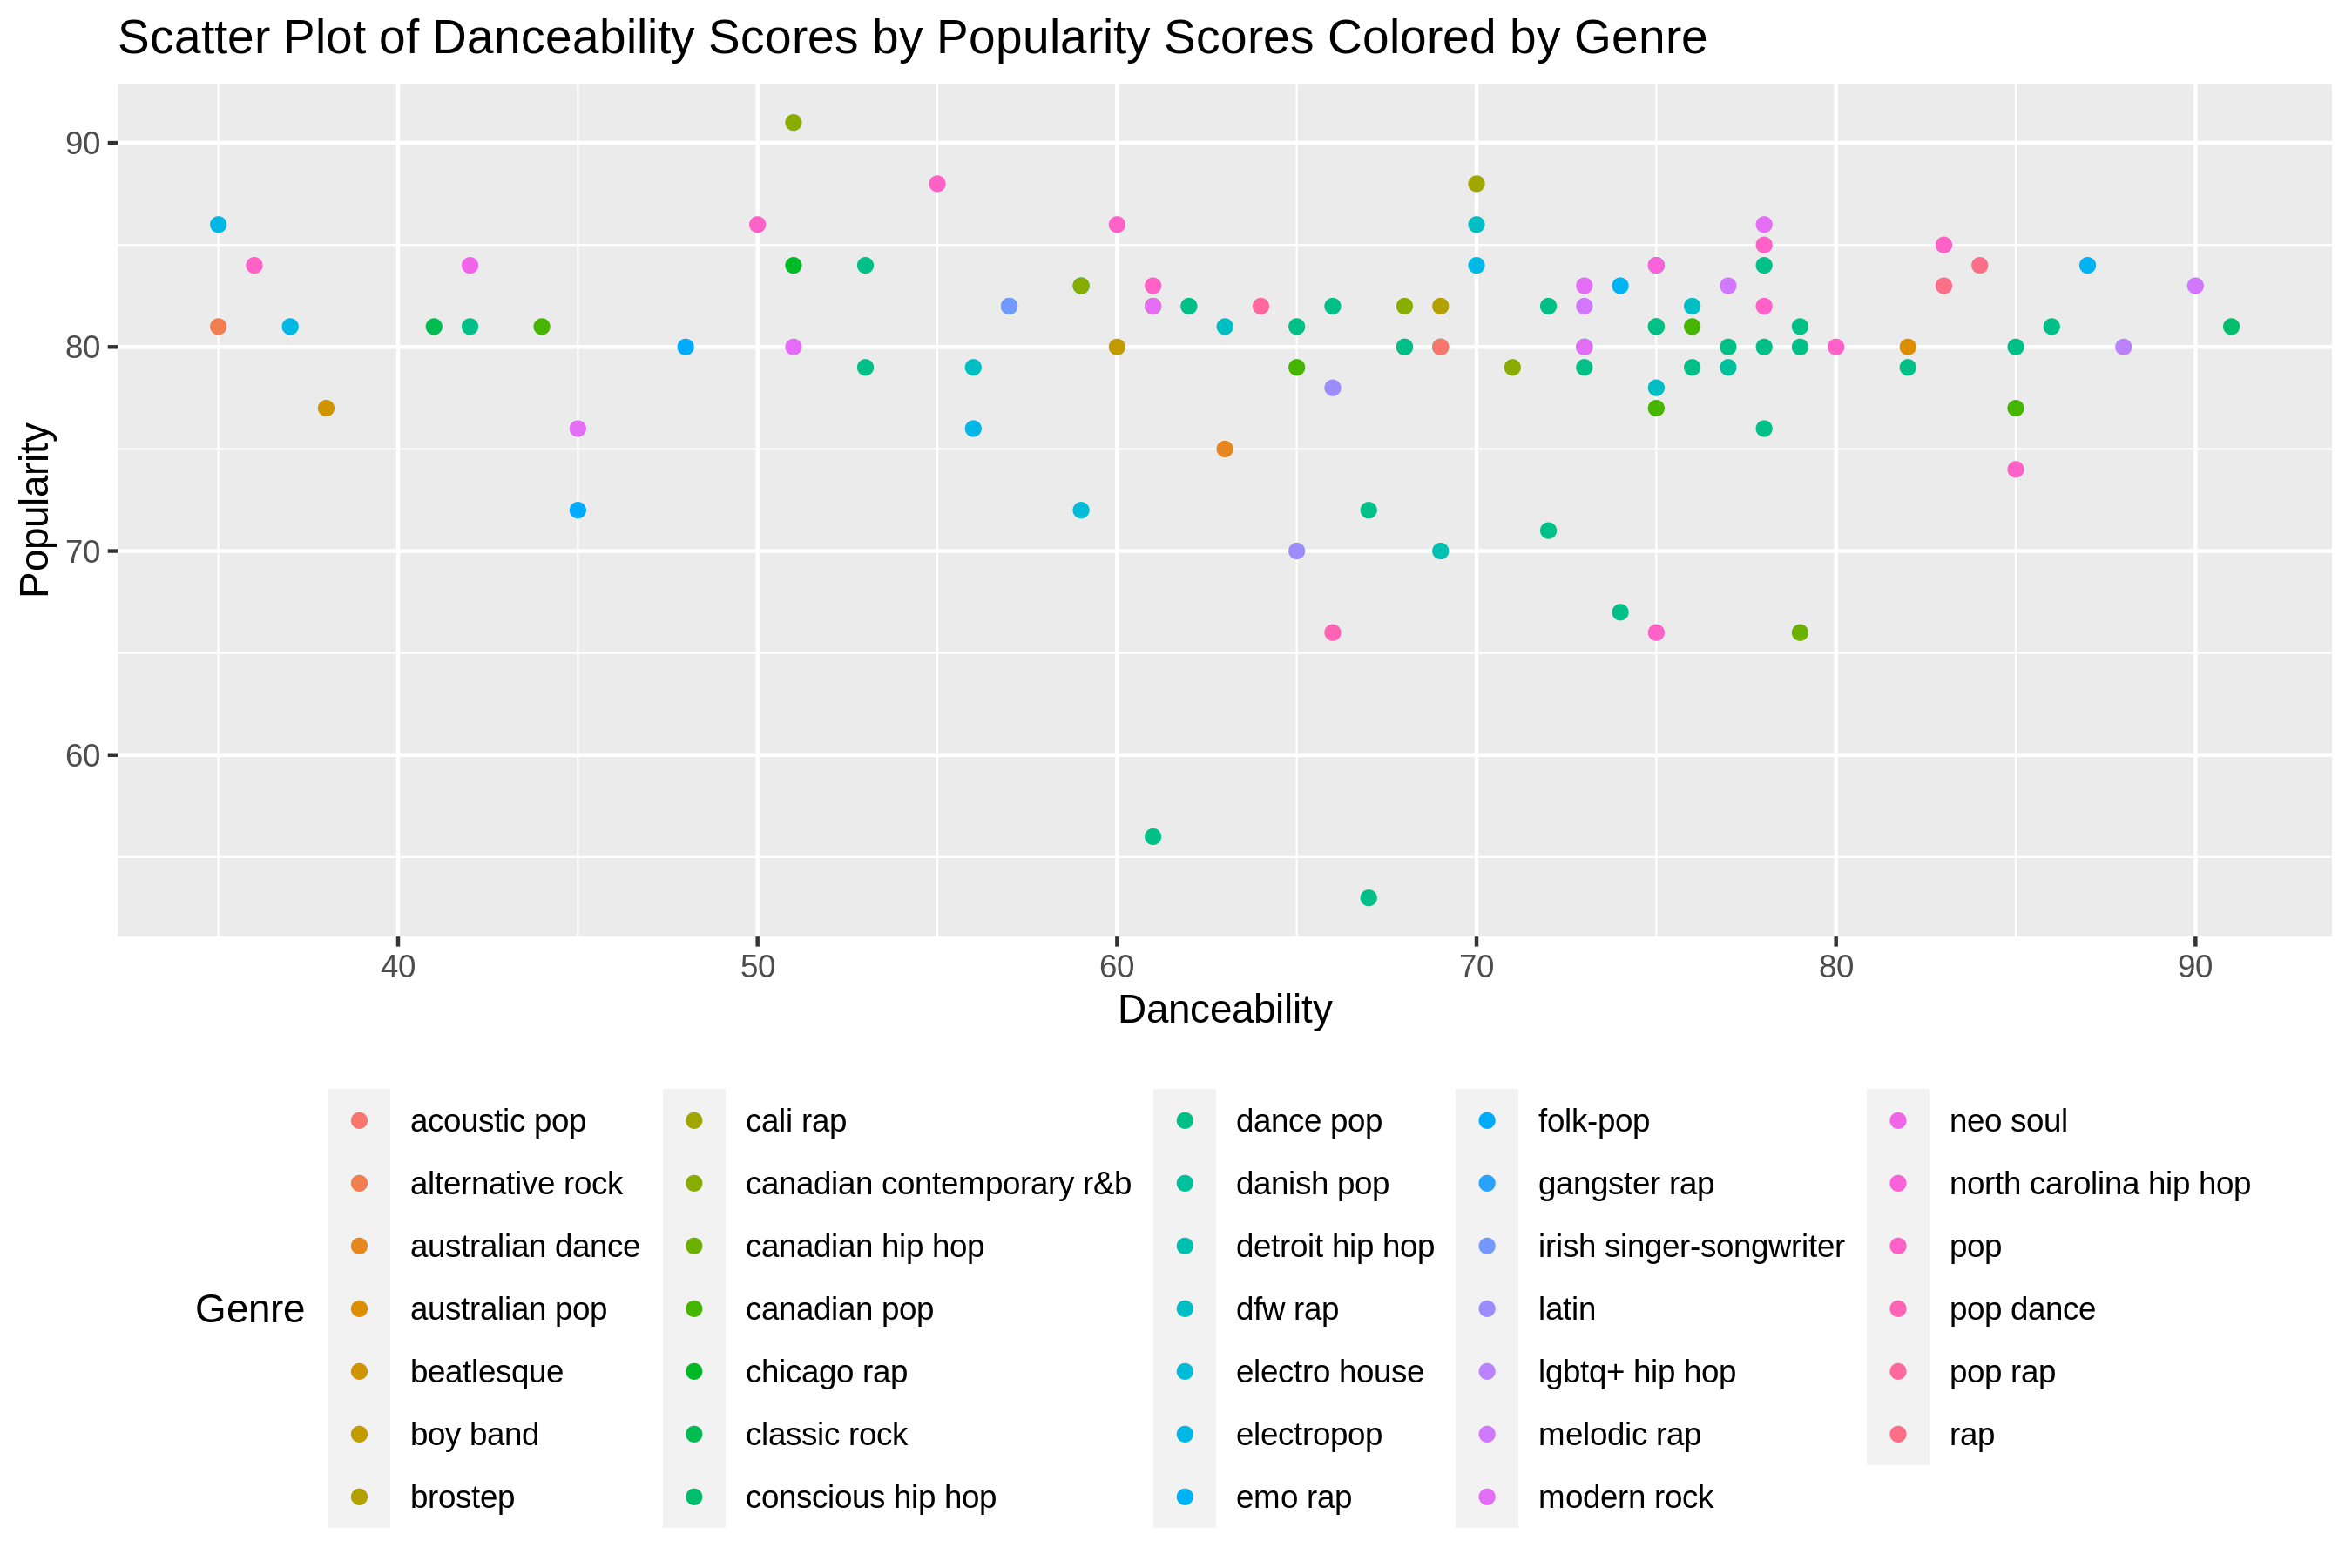

In [67]:

options(repr.plot.height = 6, repr.plot.width = 9)
p = ggplot(top100, aes(y=popularity, x=danceability, colour=top.genre)) + geom_point() +
    theme(legend.position= "bottom") +
    labs(title= "Scatter Plot of Danceability Scores by Popularity Scores Colored by Genre", x="Danceability", y="Popularity", colour= "Genre")

p


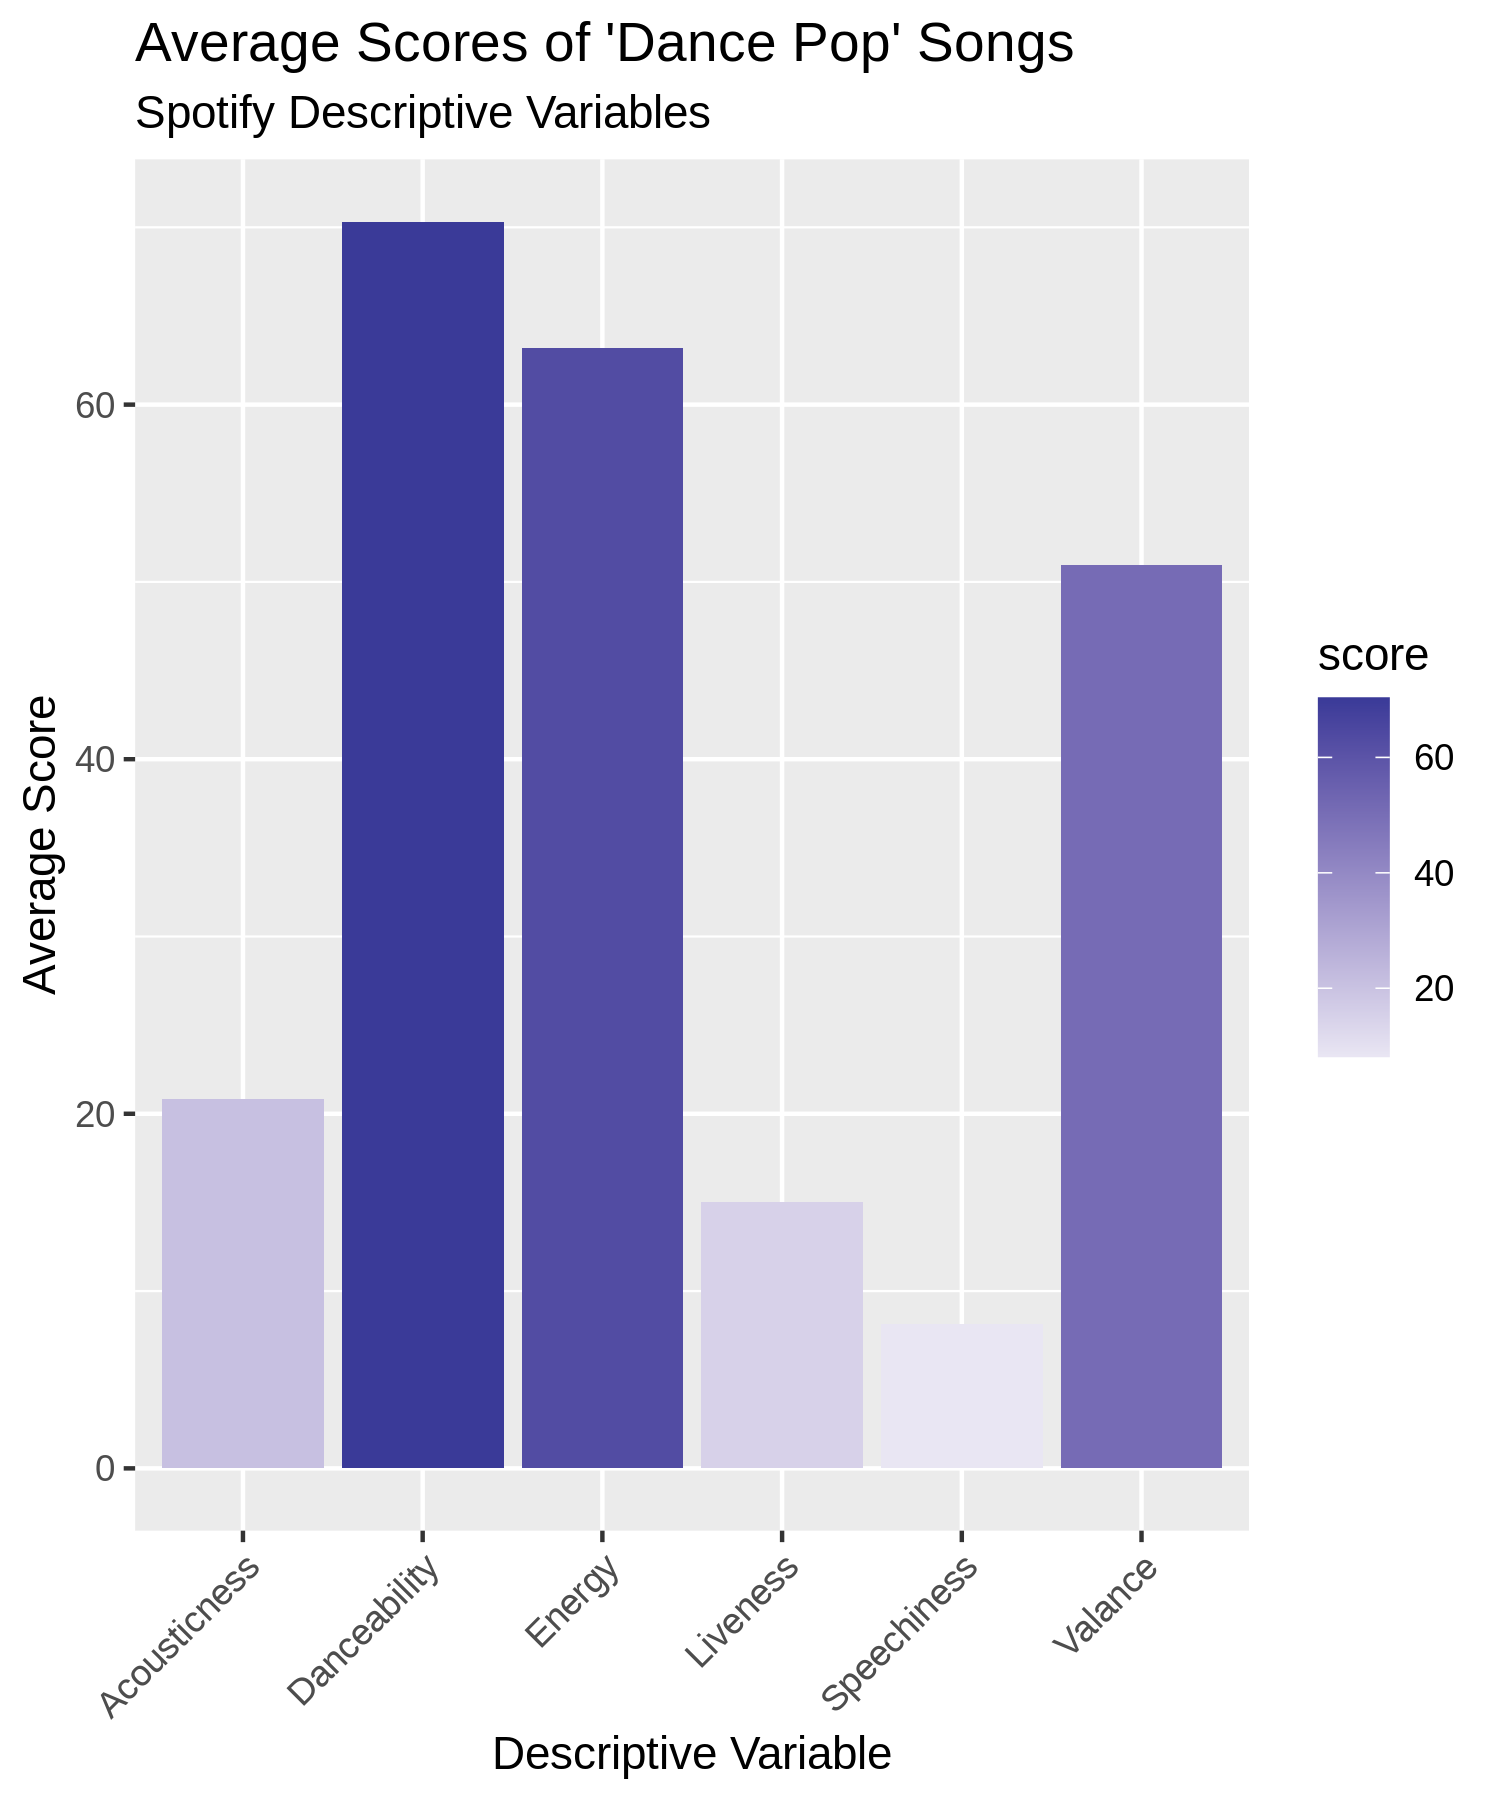

In [53]:
df <- data.frame(var = c("Danceability", "Energy", "Valance", "Acousticness", "Liveness",
                        "Speechiness" ), score = c(70.32, 63.18, 50.96, 20.82, 15, 8.143))
options(repr.plot.width = 5, repr.plot.height = 6) 
ggplot(df, aes(var, score)) +
  geom_col(aes(fill=score)) + scale_fill_gradient2()+
guides(x = guide_axis(angle = 45))+
labs(title="Average Scores of 'Dance Pop' Songs", subtitle="Spotify Descriptive Variables", x="Descriptive Variable", y="Average Score") 
#averages pulled from summary(pop)